# Importar libreria y datos

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dataset_oficial.csv')

df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28T00:00:00.000Z,2024-09-26,3.966667,NaN,18000.0
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24T00:00:00.000Z,2010-11-21,23.227778,NaN,21000.0
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08T00:00:00.000Z,2018-09-11,21.902778,NaN,42000.0
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23T00:00:00.000Z,2022-11-08,11.580556,NaN,18000.0
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22T00:00:00.000Z,2013-06-17,15.811111,NaN,36000.0


# EDA

## General

In [3]:
# Create feature age

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

In [4]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'city',
       'date_of_birth', 'last_register', 'years_experience', 'skills',
       'final_salary', 'age'],
      dtype='object')

In [5]:
# Cambiamos fechas a formato datetime.

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')
df['last_register'] = pd.to_datetime(df['last_register'], format='mixed')

/var/folders/3h/mn_gblgs6jzchz5_k2hy9rdw0000gn/T/ipykernel_35747/1513375594.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['last_register'] = pd.to_datetime(df['last_register'], format='mixed')


In [6]:
df.head()

,uuid,company,title,position,province,city,date_of_birth,last_register,years_experience,skills,final_salary,age
0,798639f1-3c92-4cef-8727-a97e200eb82b,STUDIO 21,PROFESOR DE INFORMÁTICA | Customer Service Rep...,Técnico de Soporte,Madrid,MADRID,1974-08-28 00:00:00+00:00,2024-09-26 00:00:00,3.966667,NaN,18000.0,51
1,9f71f46a-b5b5-41af-ab8b-08af20ddff42,SOL MELIA,Analista de Sistemas | CONSULTOR SENIOR SAP |...,Consultor ERP,Islas Baleares,Palma,1974-03-24 00:00:00+00:00,2010-11-21 00:00:00,23.227778,NaN,21000.0,51
2,68cee060-35ee-4e64-b66f-0ac56c6b6bca,"Grupo Ferrovial, S.A.",Gerente de Sistemas de Informacion. Dpto. Inte...,Jefe de Proyecto,Madrid,Madrid,1966-10-08 00:00:00+00:00,2018-09-11 00:00:00,21.902778,NaN,42000.0,59
3,067df379-8731-49c3-8c2c-321b612c0171,Heineken España,Responsable Helpdesk | Servicedesk Manager IT,Jefe de Informática,Sevilla,Sevilla,1968-03-23 00:00:00+00:00,2022-11-08 00:00:00,11.580556,NaN,18000.0,57
4,c76ce749-9057-456a-acee-b22f0cde50a8,"AseNet Ingenieros, S.L.",Analista | Analista-Programador | Administrado...,Administrador de Bases de Datos,Madrid,Madrid,1969-10-22 00:00:00+00:00,2013-06-17 00:00:00,15.811111,NaN,36000.0,56


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   uuid              13948 non-null  object             
 1   company           13731 non-null  object             
 2   title             13937 non-null  object             
 3   position          13948 non-null  object             
 4   province          13948 non-null  object             
 5   city              13138 non-null  object             
 6   date_of_birth     13948 non-null  datetime64[ns, UTC]
 7   last_register     13948 non-null  object             
 8   years_experience  13948 non-null  float64            
 9   skills            5344 non-null   object             
 10  final_salary      6376 non-null   float64            
 11  age               13948 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(1), object(8)
m

In [8]:
print(df.isna().sum())

print((df.isna().mean() * 100).round())

uuid                   0
company              217
title                 11
position               0
province               0
city                 810
date_of_birth          0
last_register          0
years_experience       0
skills              8604
final_salary        7572
age                    0
dtype: int64
uuid                 0.0
company              2.0
title                0.0
position             0.0
province             0.0
city                 6.0
date_of_birth        0.0
last_register        0.0
years_experience     0.0
skills              62.0
final_salary        54.0
age                  0.0
dtype: float64


In [9]:
# Derivamos edad.

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

In [10]:
print(df[df["skills"].isna()].head())

                                   uuid                  company  \
0  798639f1-3c92-4cef-8727-a97e200eb82b                STUDIO 21   
1  9f71f46a-b5b5-41af-ab8b-08af20ddff42                SOL MELIA   
2  68cee060-35ee-4e64-b66f-0ac56c6b6bca    Grupo Ferrovial, S.A.   
3  067df379-8731-49c3-8c2c-321b612c0171          Heineken España   
4  c76ce749-9057-456a-acee-b22f0cde50a8  AseNet Ingenieros, S.L.   

                                               title  \
0  PROFESOR DE INFORMÁTICA | Customer Service Rep...   
1  Analista de Sistemas | CONSULTOR SENIOR SAP  |...   
2  Gerente de Sistemas de Informacion. Dpto. Inte...   
3      Responsable Helpdesk | Servicedesk Manager IT   
4  Analista | Analista-Programador | Administrado...   

                          position        province     city  \
0               Técnico de Soporte          Madrid   MADRID   
1                    Consultor ERP  Islas Baleares    Palma   
2                 Jefe de Proyecto          Madrid   Madrid   
3 

## Univariate Analysis

### Numerical features

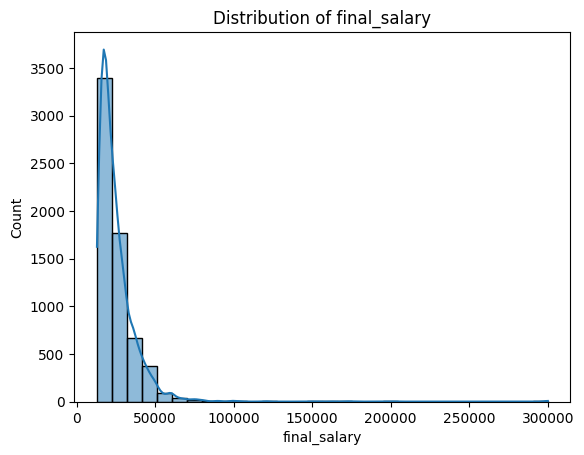

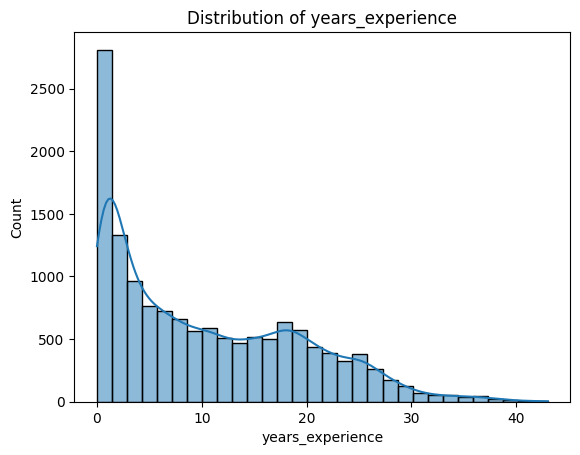

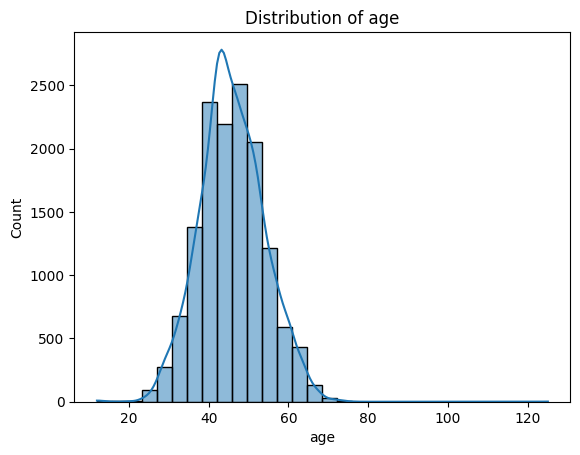


Descriptive statistics:

                    count          mean           std      min           25%  \
final_salary       6376.0  25156.524467  13492.991869  13000.0  18000.000000   
years_experience  13948.0     10.317576      9.015014      0.0      2.033333   
age               13948.0     45.888514      8.121689     12.0     41.000000   

                           50%      75%            max  
final_salary      21000.000000  30000.0  300000.000000  
years_experience      7.947222     17.4      43.016667  
age                  45.000000     51.0     125.000000  


In [11]:
# Continuous variables univariate analysis

col_num = ['final_salary', 'years_experience', 'age']

for col in col_num:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Summary stats
print("\nDescriptive statistics:\n")
print(df[col_num].describe().T)

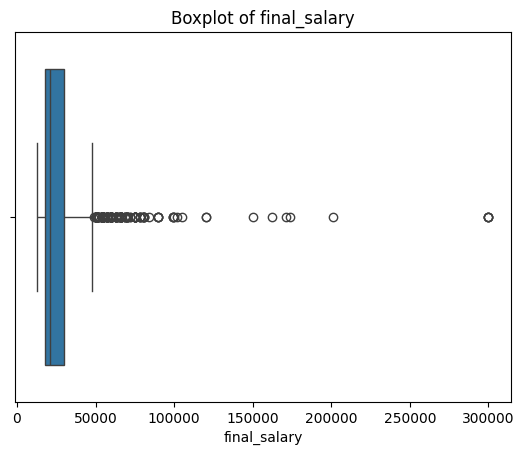

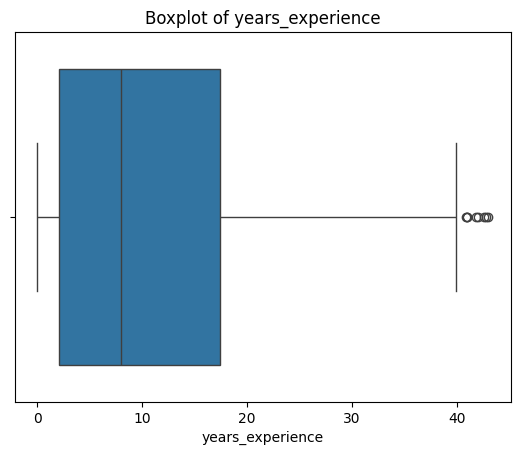

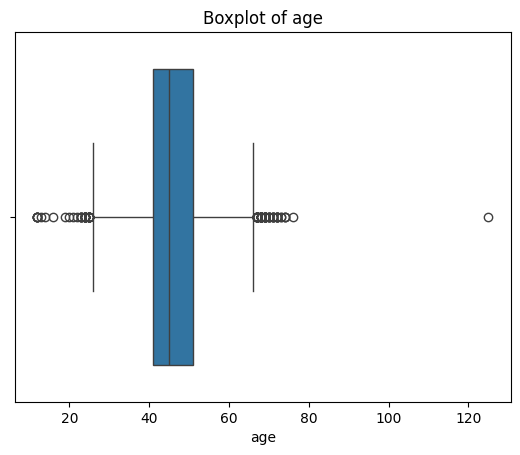

In [12]:
for col in col_num:
    plt.figure()
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


In [13]:
# Skewness value

for i in col_num:
    print(f'{i}: {skew(df[i].dropna())}')

final_salary: 7.416553467588333
years_experience: 0.7102157275431691
age: 0.17139083201249714


In [14]:
# Kurtosis value

for i in col_num:
    print(f'{i}: {kurtosis(df[i].dropna())}')

final_salary: 121.13066035999731
years_experience: -0.4448364715543316
age: 0.6355405335033475


**Findings:**
* Clearly salary is extremely unbalanced. With a skew value of 7.41, while other two variables under 0.5. The closer to 0, the more balanced.
  * Additionally, salary has a kurtosis of 121!
* Years of experience is also slightly skewed, with more people with less experience.

### Categorical features

In [15]:
# Categorical variables to explore
col_cat = ['position', 'province', 'city']
total_rows = len(df)

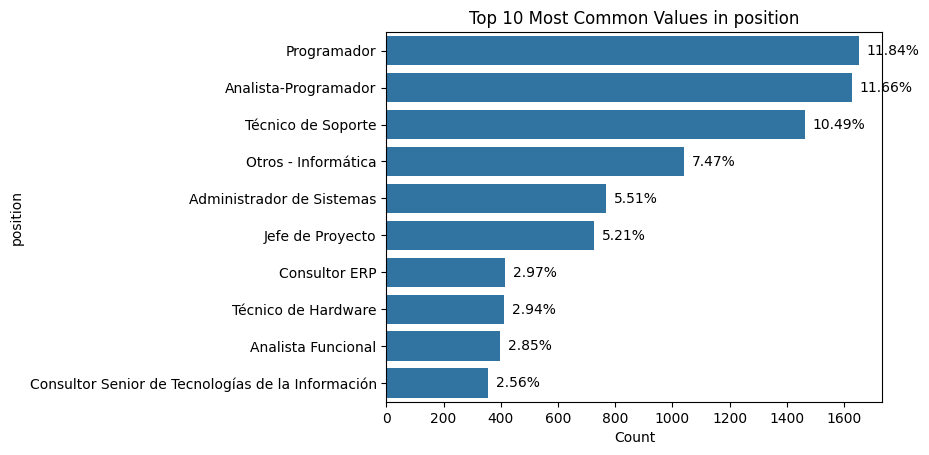


🔡 Top 5 position values:
                                                    Count  Percentage
position                                                            
Programador                                         1652       11.84
Analista-Programador                                1627       11.66
Técnico de Soporte                                  1463       10.49
Otros - Informática                                 1042        7.47
Administrador de Sistemas                            769        5.51
Jefe de Proyecto                                     726        5.21
Consultor ERP                                        414        2.97
Técnico de Hardware                                  410        2.94
Analista Funcional                                   398        2.85
Consultor Senior de Tecnologías de la Información    357        2.56


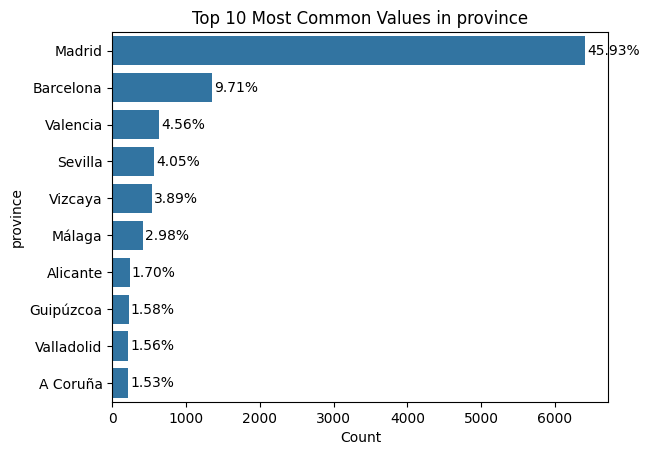


🔡 Top 5 province values:
             Count  Percentage
province                     
Madrid       6407       45.93
Barcelona    1355        9.71
Valencia      636        4.56
Sevilla       565        4.05
Vizcaya       542        3.89
Málaga        416        2.98
Alicante      237        1.70
Guipúzcoa     220        1.58
Valladolid    218        1.56
A Coruña      214        1.53


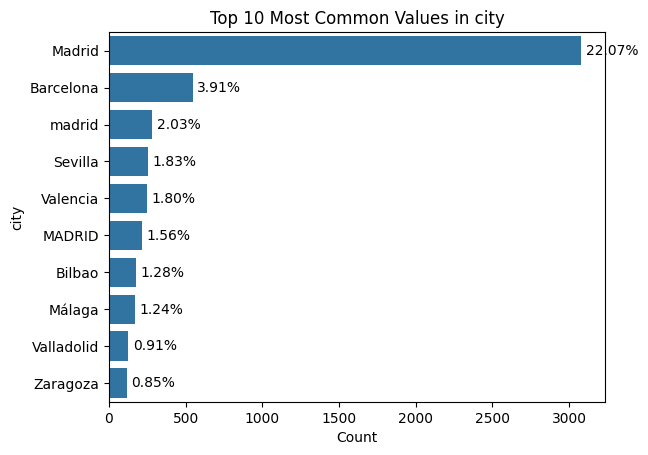


🔡 Top 5 city values:
             Count  Percentage
city                         
Madrid       3079       22.07
Barcelona     546        3.91
madrid        283        2.03
Sevilla       255        1.83
Valencia      251        1.80
MADRID        218        1.56
Bilbao        179        1.28
Málaga        173        1.24
Valladolid    127        0.91
Zaragoza      119        0.85


In [16]:

for col in col_cat:
    plt.figure()
    top = df[col].value_counts().head(10)
    percent = (top / total_rows * 100).round(2)

    ax = sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top 10 Most Common Values in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

    # Add percentage labels
    for i, (count, pct) in enumerate(zip(top.values, percent)):
        ax.text(count + total_rows * 0.002, i, f"{pct:.2f}%", va='center')

    plt.show()

    print(f"\n🔡 Top 5 {col} values:\n", pd.concat([top, percent], axis=1, keys=['Count', 'Percentage']))


In [17]:
for col in col_cat:
    print(f"{col_cat} → {df[col_cat].nunique()} unique values")

['position', 'province', 'city'] → position     148
province      51
city        2510
dtype: int64 unique values
['position', 'province', 'city'] → position     148
province      51
city        2510
dtype: int64 unique values
['position', 'province', 'city'] → position     148
province      51
city        2510
dtype: int64 unique values


In [18]:
# Count company occurrences
company_counts = df['company'].value_counts()

# Count how many appear only once
single_appearance = (company_counts == 1).sum()

# Total unique companies
total_unique = company_counts.shape[0]

# Percentage
percentage_single = (single_appearance / total_unique) * 100
print(f"{percentage_single:.2f}% of companies appear only once.")


95.90% of companies appear only once.


In [19]:
company_counts = df['company'].value_counts()

more_than_once = (company_counts > 1).sum()
print(f"{more_than_once} companies appear more than once out of {df['company'].nunique()} total unique companies.")


496 companies appear more than once out of 12103 total unique companies.


In [20]:
for col in col_cat:
    if df[col].nunique() <= 10:
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Distribution of {col}")
        plt.ylabel("")
        plt.show()

**Findings:**

* Mayority of samples come from Madrid and Barcelona. 
* Mainly tech jobs. 

## Multivariate Analysis

### Salary vs Years of experience / age

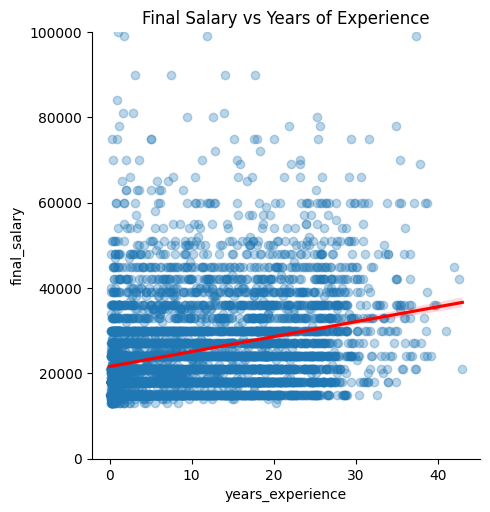

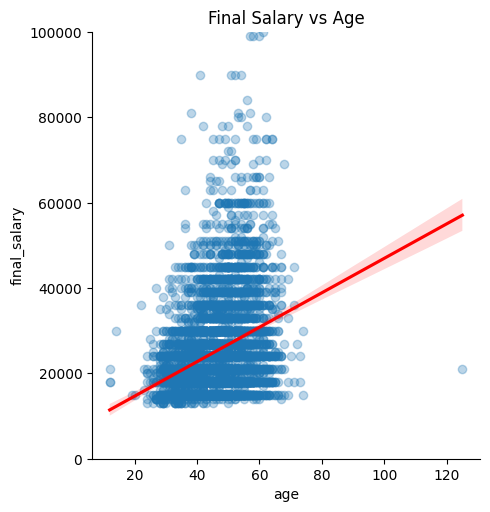

In [21]:
# Scatter: Final Salary vs Years of Experience
sns.lmplot(x='years_experience', y='final_salary', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.ylim(0, 100000)  # adjust as needed
plt.title("Final Salary vs Years of Experience")
plt.show()

# Scatter: Final Salary vs Age
sns.lmplot(x='age', y='final_salary', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.ylim(0, 100000)  # adjust as needed
plt.title("Final Salary vs Age")
plt.show()


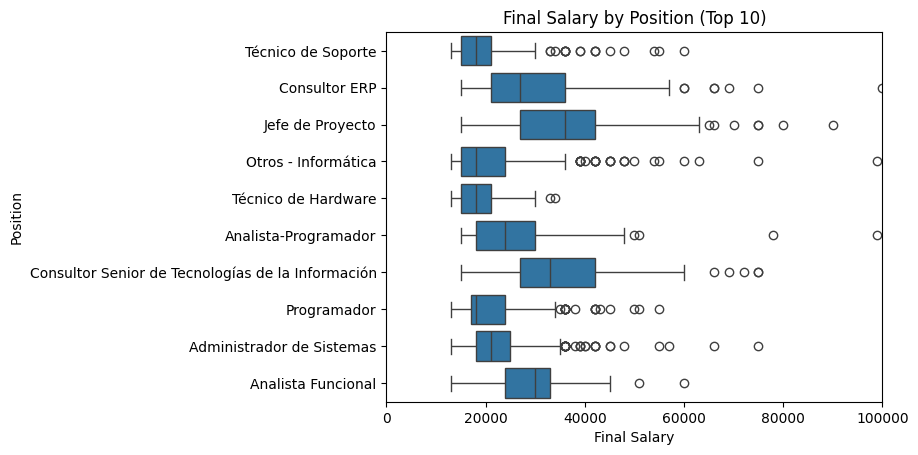

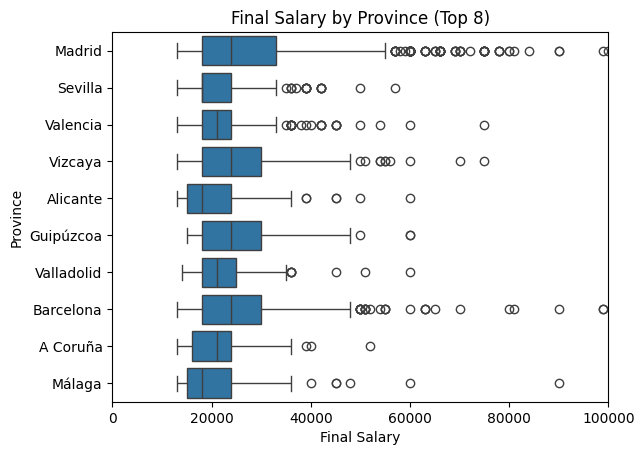

In [22]:
# Final salary by position (Top 10)
top_positions = df['position'].value_counts().head(10).index
plt.figure()
sns.boxplot(data=df[df['position'].isin(top_positions)], x='final_salary', y='position')
plt.xlim(0, 100000)
plt.title("Final Salary by Position (Top 10)")
plt.xlabel("Final Salary")
plt.ylabel("Position")
plt.show()

# Final salary by province (Top 10)
top_provinces = df['province'].value_counts().head(10).index
plt.figure()
sns.boxplot(data=df[df['province'].isin(top_provinces)], x='final_salary', y='province')
plt.xlim(0, 100000)
plt.title("Final Salary by Province (Top 8)")
plt.xlabel("Final Salary")
plt.ylabel("Province")
plt.show()


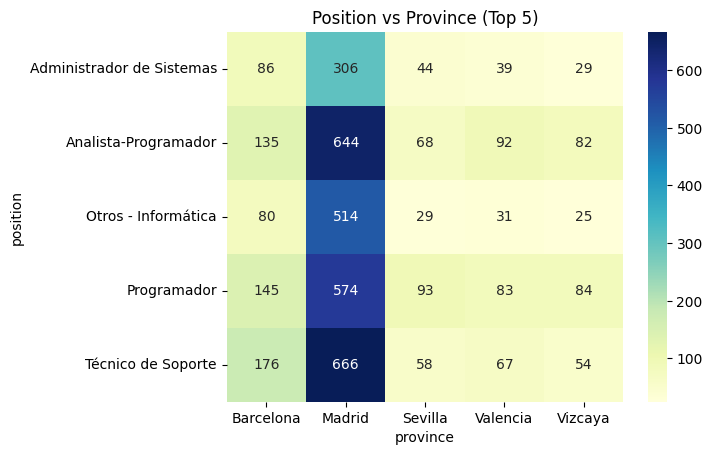

In [23]:
# Position vs Province: top 5 of each
cross_tab = pd.crosstab(
    df[df['position'].isin(df['position'].value_counts().head(5).index)]['position'],
    df[df['province'].isin(df['province'].value_counts().head(5).index)]['province']
)

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Position vs Province (Top 5)")
plt.show()


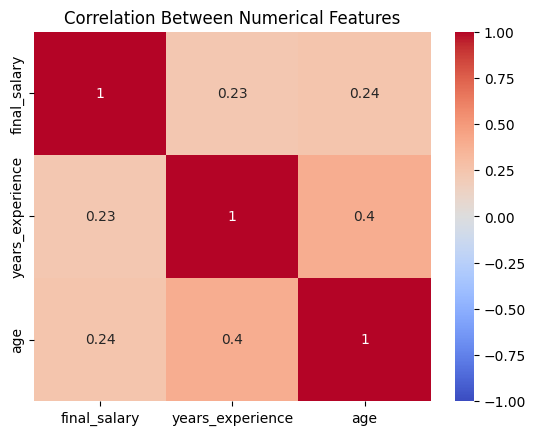

In [24]:
# Correlation heatmap
plt.figure()
numerical_features = ['final_salary', 'years_experience', 'age']
corr = df[numerical_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Numerical Features")
plt.show()

# Feature Engineering

## Last registry

In [24]:
df['last_register'] = pd.to_datetime(df['last_register'], errors='coerce').dt.year

## Province & Comunidad

In [26]:
df['skills'].isnull().sum()

np.int64(8604)

In [27]:
# Diccionario con comunidades.

prov_to_ccaa = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Asturias': 'Principado de Asturias',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellón': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Islas Baleares': 'Islas Baleares',
    'Jaén': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón'
}

In [ ]:
df['comunidad'] = df['province'].map(prov_to_ccaa)

In [ ]:
df.groupby('comunidad')['final_salary'].mean().sort_values(ascending=False)

In [ ]:
# Agrupación y conteo
counts = df['comunidad'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', edgecolor='black')
plt.title('Número de registros por comunidad autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# por que 900!?!?!?!?!?
# Umbral mínimo para considerar comunidad significativa ...
umbral = 500

# Obtener conteo de comunidades
comunidad_counts = df['comunidad'].value_counts()

# Crear nueva columna con agrupación
df['comunidad'] = df['comunidad'].apply(
    lambda x: x if pd.notnull(x) and comunidad_counts.get(x, 0) >= umbral else 'Otros'
)

In [ ]:
df['comunidad']

In [ ]:
# Nuevo conteo
counts_agrupados = df['comunidad'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
counts_agrupados.plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Número de registros por comunidad autónoma (agrupado)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
def limpiar_columna(col):
    if col.startswith('comunidad_'):
        nombre = col.replace('comunidad_', '')
        # Quitar tildes
        nombre = unicodedata.normalize('NFKD', nombre).encode('ascii', 'ignore').decode('utf-8')
        # Reemplazar espacios y guiones por guiones bajos, bajar todo a minúsculas
        nombre = re.sub(r'[^a-zA-Z0-9]', '_', nombre).lower()
        # Evitar múltiples guiones bajos seguidos
        nombre = re.sub('_+', '_', nombre).strip('_')
        return f"comunidad_{nombre}"
    return col

In [ ]:
df = pd.get_dummies(df, columns=['comunidad'], prefix='comunidad', drop_first=False)

# Aplicar a nombres de columnas
df.columns = [limpiar_columna(col) for col in df.columns]

In [ ]:
df.columns

## Company

In [28]:
!python -mspacy download es_core_news_sm # descargarnos spaCy para limpiar bien.
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.4 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
nlp = spacy.load("es_core_news_sm") # modelo de ESP.

# Función para limpiar company.
def spacy_clean(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.lower().strip())

    # dejamos solamente valores alphanumericos.
    tokens = [token.text for token in doc if token.is_alpha or token.is_digit]

    return ' '.join(tokens)

In [ ]:
# Aplicamos funcion a columna

df['company_clean'] = df['company'].apply(spacy_clean)

In [ ]:
# Apliquemos sentence transformers -> es lo mas eficiente
!pip install sentence_transformers

from sentence_transformers import SentenceTransformer

In [ ]:
# Iniciamos modelo y vemos que tal.

model = SentenceTransformer('distiluse-base-multilingual-cased-v2') # modelo en español.

texts = df['company_clean'].astype(str).tolist() # pasamos todas las companias a una lista para crear los embeddings.

# Genera embeddings!
embeddings = model.encode(texts, show_progress_bar=True)

In [ ]:
# Join al df.

# Convert to DataFrame
emb_df = pd.DataFrame(embeddings, columns=[f'company_emb_{i}' for i in range(embeddings.shape[1])])

# Merge with original df
df = pd.concat([df.reset_index(drop=True), emb_df], axis=1)

In [ ]:
# al parecer los datos parecen muy bien formateados. Deben de ser elegidos y no escritos probablemente.

# Limpiemos pero muy muy basico.
def spacy_clean_position(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.strip().lower())  # lowercase + remove leading/trailing spaces

    # Keep only words (no punctuation, no stopwords, etc.)
    tokens = [token.text for token in doc if token.is_alpha]

    return ' '.join(tokens)

In [ ]:
df['position_clean'] = df['position'].apply(spacy_clean_position)

In [ ]:
# Encode position_clean using the same multilingual model
position_texts = df['position_clean'].astype(str).tolist()

position_embeddings = model.encode(position_texts, show_progress_bar=True)

In [ ]:
# Join

position_emb_df = pd.DataFrame(position_embeddings, columns=[f'position_emb_{i}' for i in range(position_embeddings.shape[1])])

df = pd.concat([df.reset_index(drop=True), position_emb_df], axis=1)

## Title

In [ ]:
def spacy_clean_title_with_commas(text):
    if not text or pd.isna(text):
        return ''

    # Normalize weird separators before spaCy
    text = text.replace('|', ',')
    text = text.replace('/', ',')
    text = text.replace(' - ', ',')  # only where dash is used like a list separator

    doc = nlp(text.lower().strip())

    # Lemmatize and keep alpha tokens or commas
    tokens = []
    for token in doc:
        if token.is_alpha:
            tokens.append(token.lemma_)
        elif token.text == ',':
            tokens.append(',')

    return ' '.join(tokens)

In [ ]:
df['title_clean'] = df['title'].apply(spacy_clean_title_with_commas)
df['title_clean']

In [ ]:
df['title_clean'].head(50)

In [ ]:
# Again, transformers.

title_texts = df['title_clean'].tolist()
title_embeddings = model.encode(title_texts, show_progress_bar=True)

In [ ]:
title_emb_df = pd.DataFrame(title_embeddings, columns=[f'title_emb_{i}' for i in range(title_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), title_emb_df], axis=1)

## Skills

In [ ]:
from itertools import chain

all_skills = df['skills'].dropna().apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
flat_skills = list(chain.from_iterable(all_skills))
print(f"Unique skills: {len(set(flat_skills))}")
print(sorted(set(flat_skills))[:50])  # Peek at the first 50

In [ ]:
df['has_skills'] = df['skills'].notna().astype(int)
print(df.groupby('has_skills')['final_salary'].describe())

In [ ]:
# Funcion clasica para limpiar

import re

def clean_skills(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[\[\]"]', '', text)  # remove brackets and quotes
    text = re.sub(r'\s*,\s*', ', ', text)  # ensure clean spacing around commas
    return text.strip()

In [ ]:
df['skills_clean'] = df['skills'].apply(clean_skills)

In [ ]:
skills_texts = df['skills_clean'].tolist()
skills_embeddings = model.encode(skills_texts, show_progress_bar=True)

skills_emb_df = pd.DataFrame(skills_embeddings, columns=[f'skills_emb_{i}' for i in range(skills_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), skills_emb_df], axis=1)